# **Pip & Requirements**

In [1]:
#pip install -r /workspaces/Decision-Tree-Project-Tutorial/requirements.txt

# **All Imports**

In [4]:
import timeit
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from pickle import dump

## **Step 1: Data Import**

In [5]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Save raw data

In [1]:
#total_data.to_csv("/workspaces/Decision-Tree-Project-Tutorial/data/raw/rawdatafile.csv", index = False)

## **Step 2: Exploration and Data Cleaning**


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
total_data_c = total_data.copy()
total_data_c.Outcome = total_data_c.Outcome.astype('object')

In [6]:
total_data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [7]:
total_data_c.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [8]:
total_data_c.describe(include='object').T

,count,unique,top,freq
Outcome,768,2,0,500


 **Drop Duplicates**

In [9]:
#Checking for duplicates
total_data_c.duplicated().sum()

0

In [10]:
total_data_c = total_data_c.drop_duplicates().reset_index(drop = True)
total_data_c.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Null Values management**

In [11]:
total_data_c.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

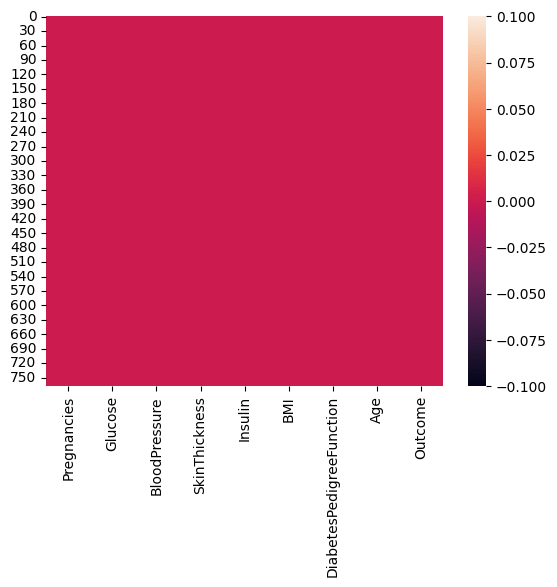

In [12]:
sns.heatmap(total_data_c.isnull())

## **Step 2: Visualization**

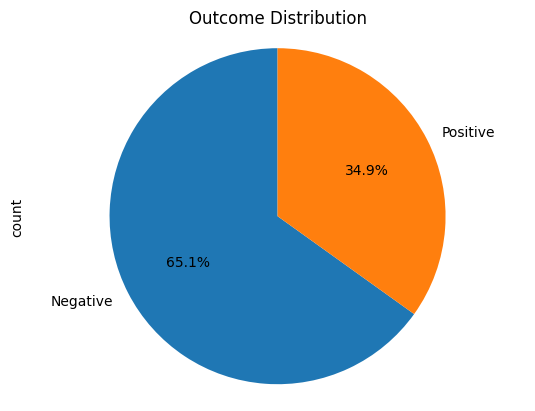

In [13]:
total_data_c['Outcome'] = total_data_c['Outcome'].replace({0: 'Negative', 1: 'Positive'})

# Create a pie chart
total_data_c['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Outcome Distribution')
plt.show()


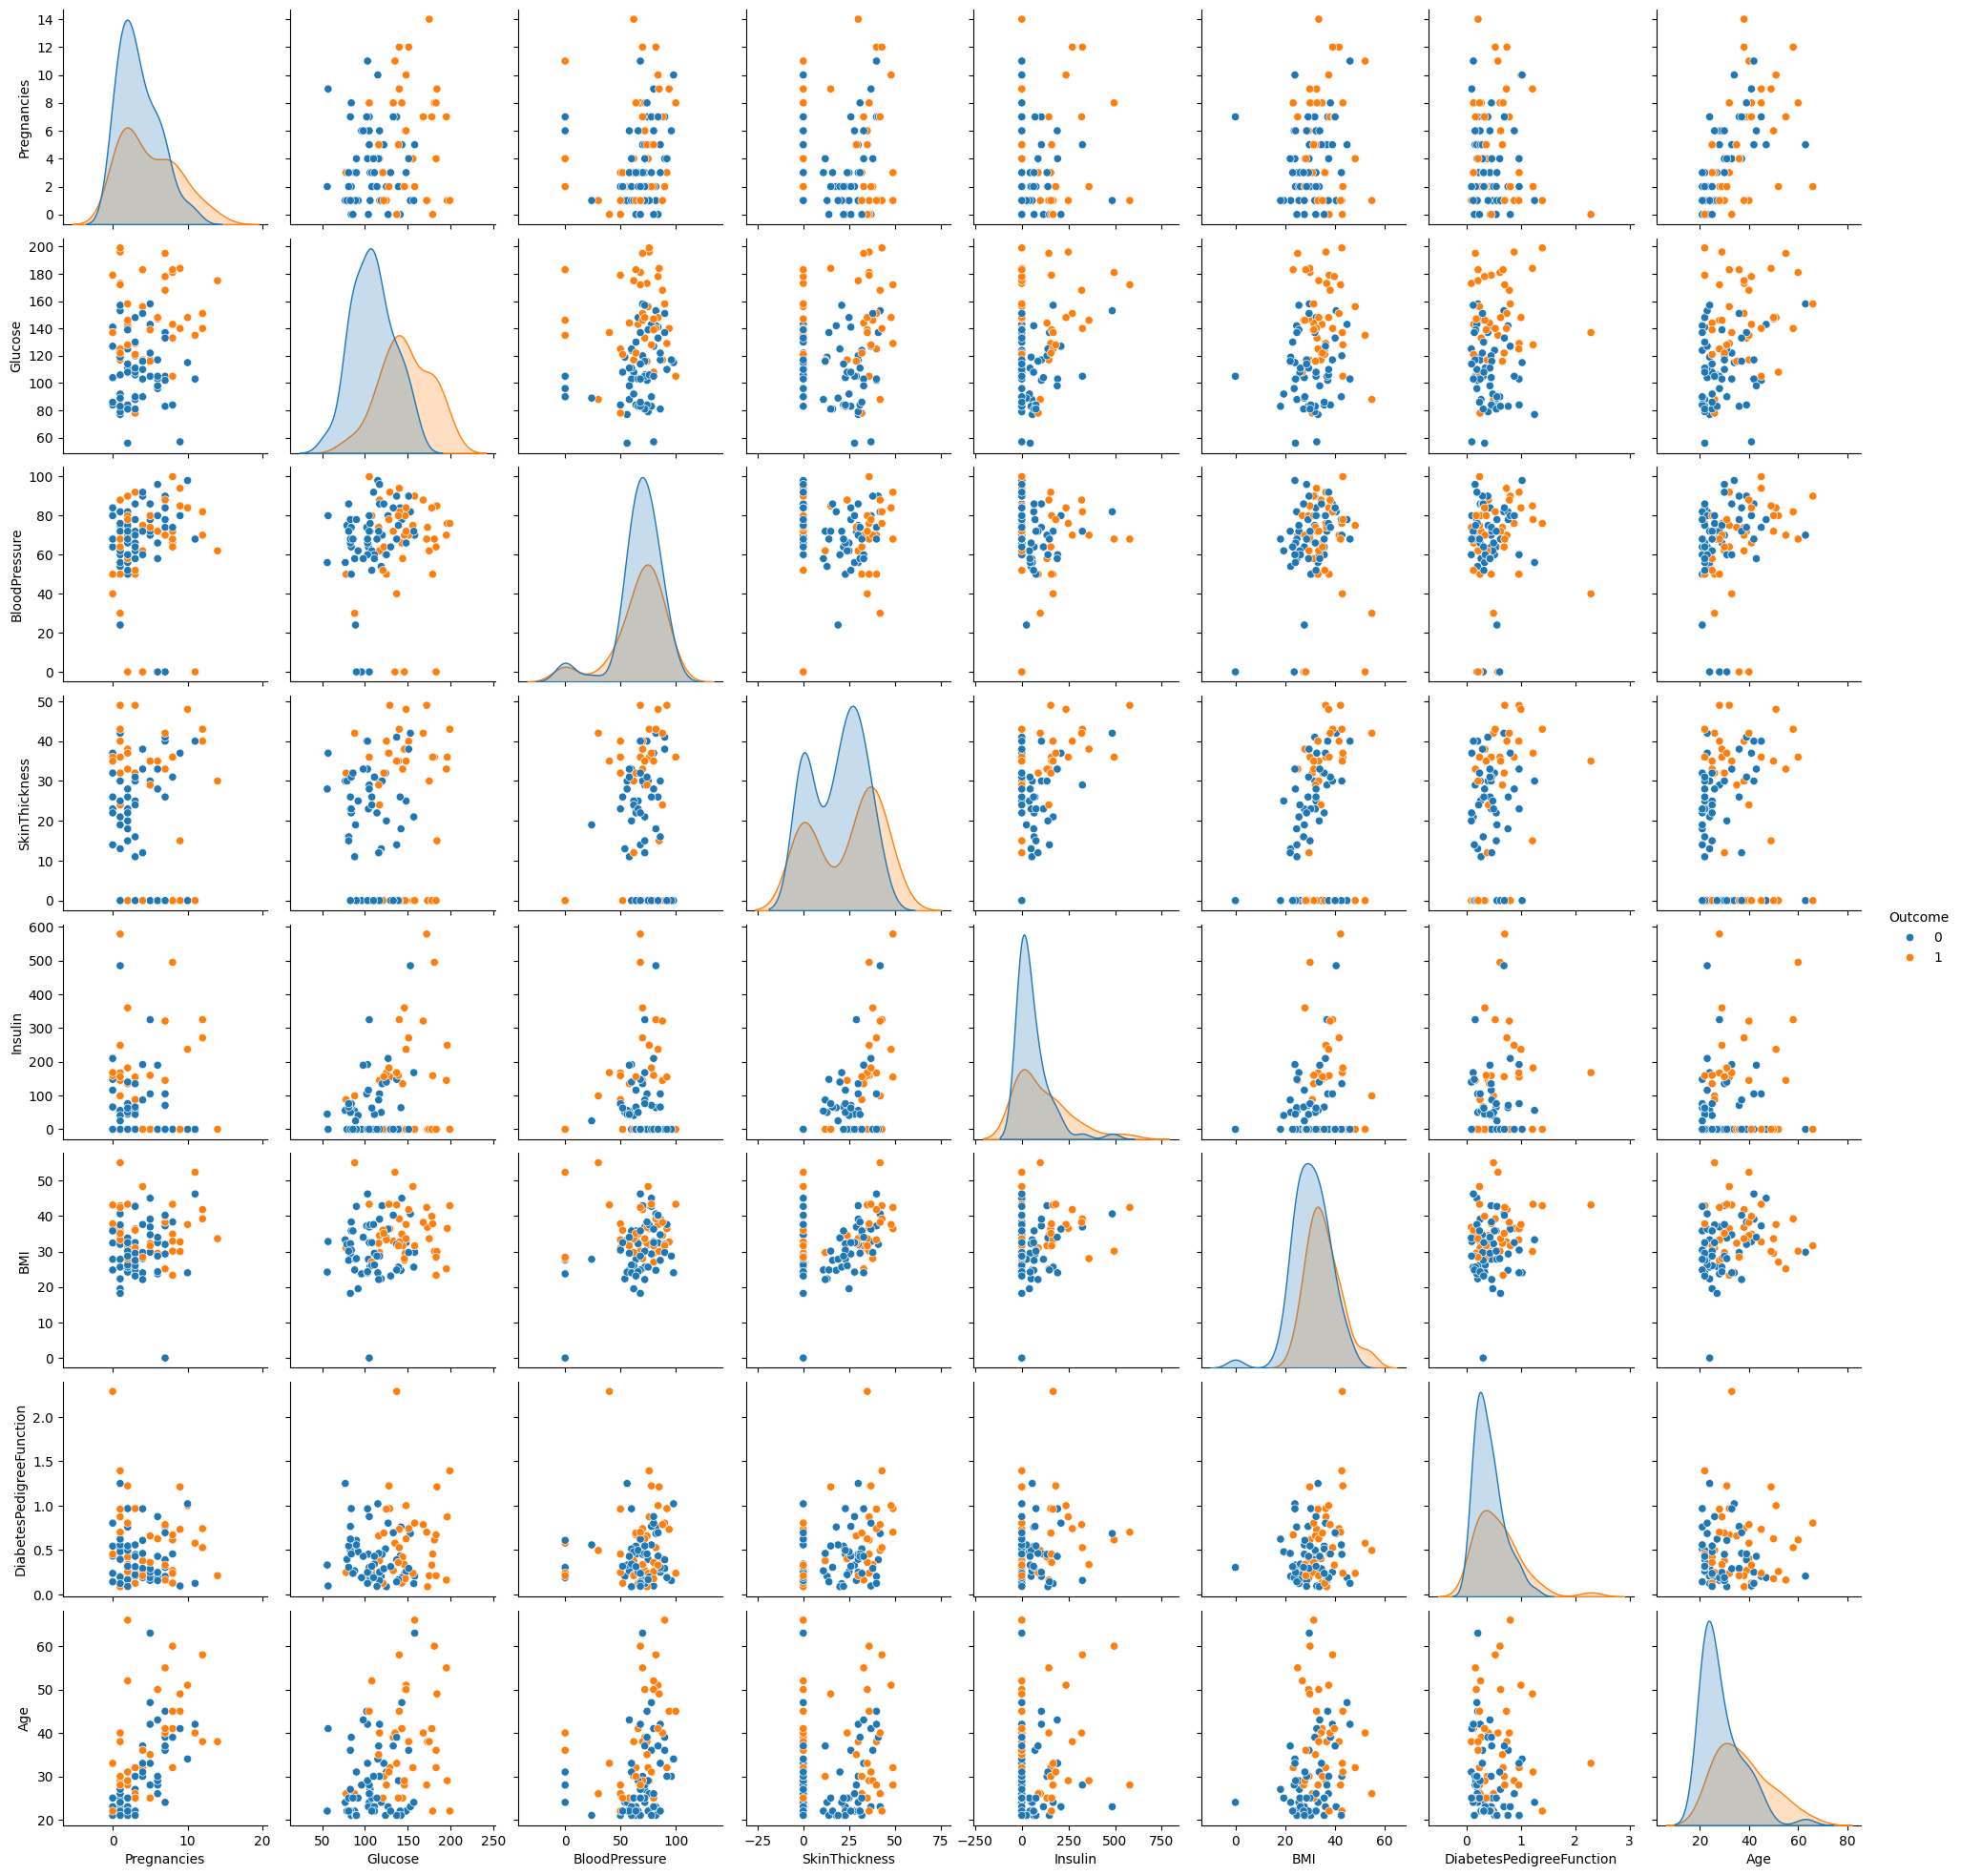

In [112]:
sns.pairplot(total_data.sample(100), hue='Outcome')
plt.show()

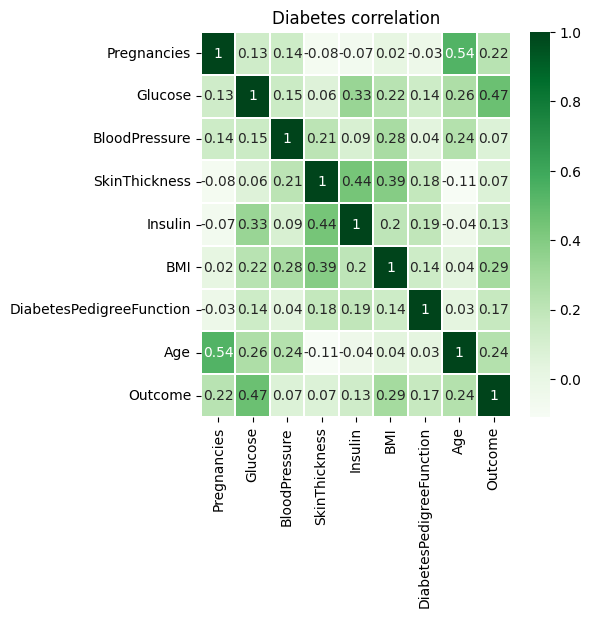

In [14]:
plt.figure(figsize = (5,5))
plt.title('Diabetes correlation')
corr = total_data.corr()
sns.heatmap(round(corr,2),xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens", annot=True)
plt.show()

Correlation relationships with the 'Outcome' variable (threshold > 0.17):
                   Variable  Correlation
1                   Glucose     0.466581
2                       BMI     0.292695
4                       Age     0.238356
0               Pregnancies     0.221898
3  DiabetesPedigreeFunction     0.173844


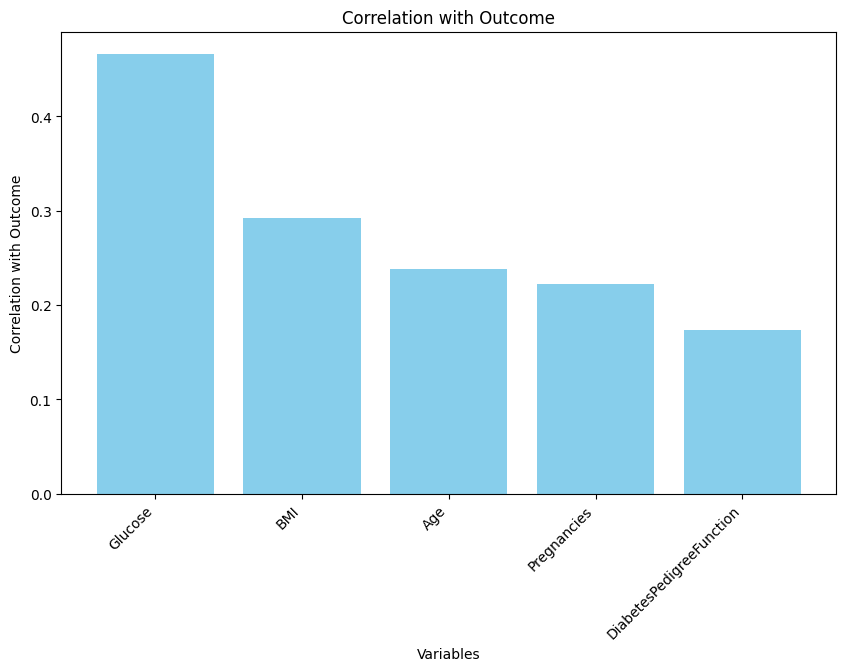

In [16]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Calculate the correlation matrix
correlation_matrix = total_data.corr()

# Create a DataFrame to store the relationships
relations_df = pd.DataFrame(columns=['Variable', 'Correlation'])

# Set the correlation threshold
correlation_threshold = 0.17

# Loop through variables and calculate correlation with Outcome
for column in correlation_matrix.columns:
    if column != 'Outcome':  # Skip the Outcome variable itself
        correlation_value = correlation_matrix.loc['Outcome', column]
        
        # Check if the absolute correlation value is greater than the threshold
        if abs(correlation_value) > correlation_threshold:
            temp_df = pd.DataFrame({'Variable': [column], 'Correlation': [correlation_value]})
            relations_df = pd.concat([relations_df, temp_df], ignore_index=True)

# Sort the DataFrame by the magnitude of correlation
relations_df = relations_df.sort_values(by='Correlation', ascending=False)

# Print the DataFrame
print(f"Correlation relationships with the 'Outcome' variable (threshold > {correlation_threshold}):")
print(relations_df)

# Optional: Bar chart to visualize the correlations
plt.figure(figsize=(10, 6))
plt.bar(relations_df['Variable'], relations_df['Correlation'], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Correlation with Outcome')
plt.title('Correlation with Outcome')
plt.xticks(rotation=45, ha='right')
plt.show()


warnings.filterwarnings("default", category=FutureWarning)


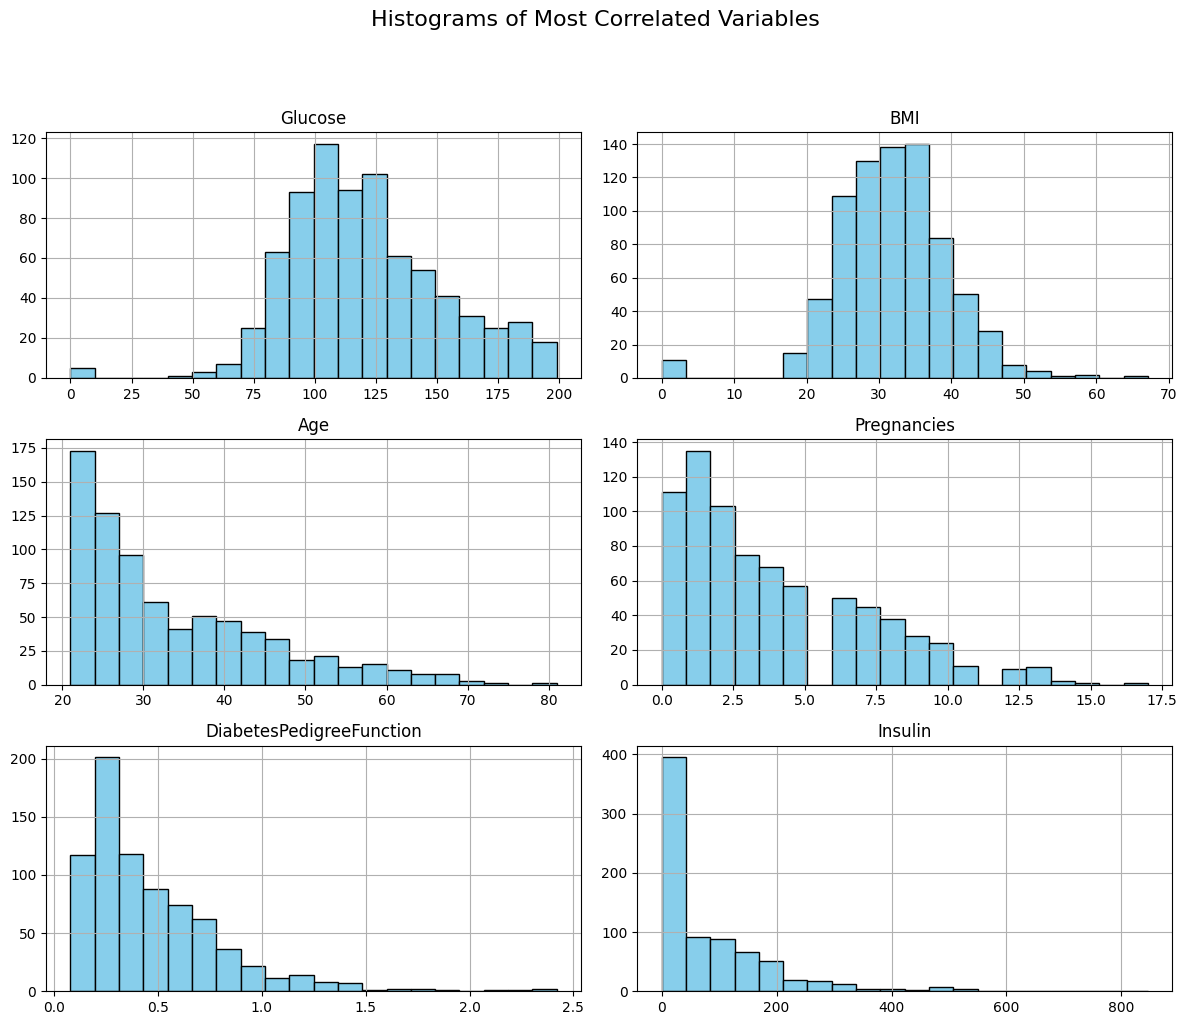

In [17]:
most_correlated_vars = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin' ]
filtered_data = total_data[most_correlated_vars]

# Plot histograms of the most correlated variables
filtered_data.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Most Correlated Variables', x=0.5, y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to prevent overlap
plt.show()


In [116]:
filtered_insulin = total_data[total_data["Insulin"] != 0]

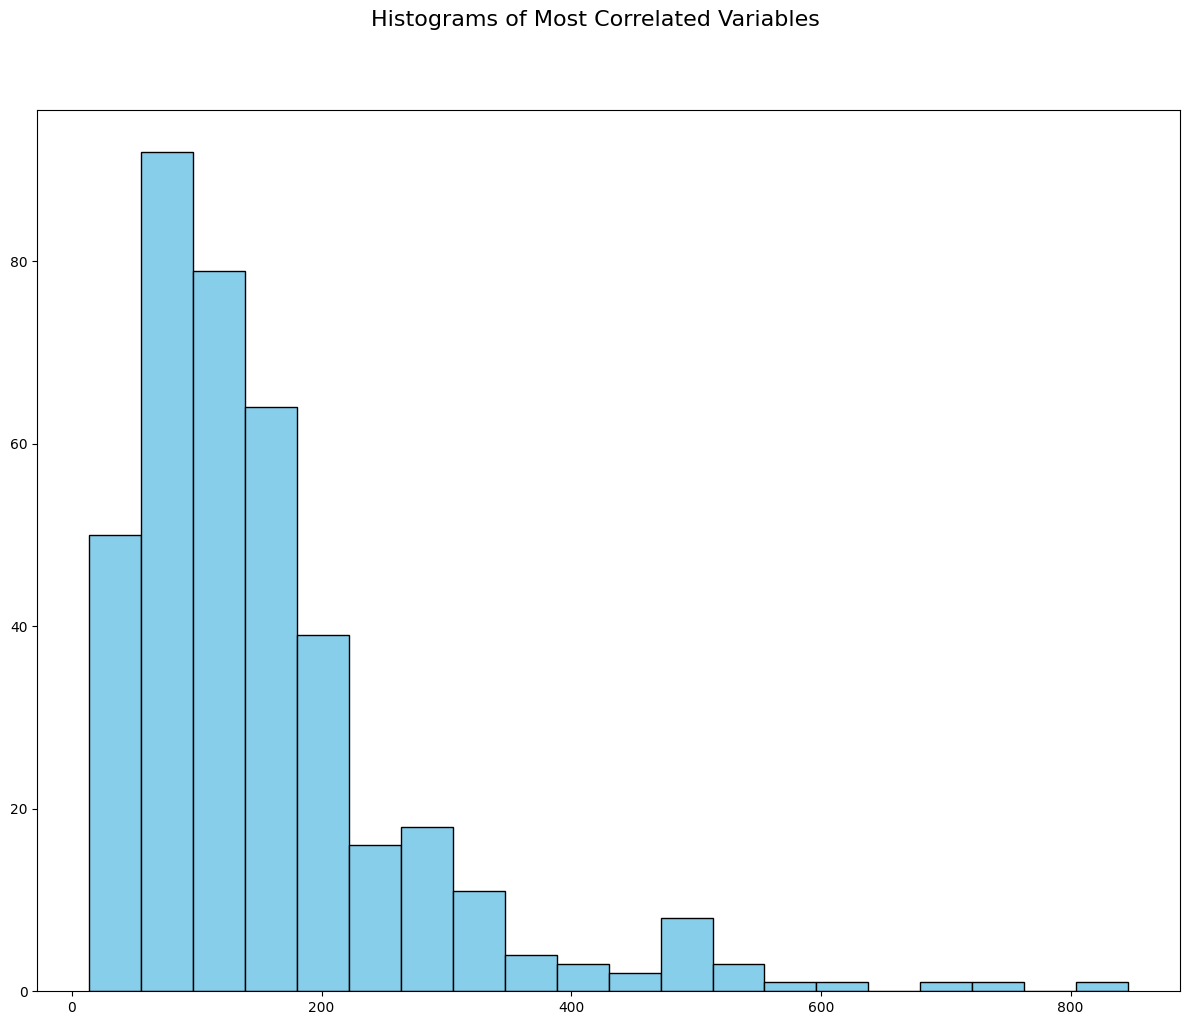

In [117]:
plt.figure(figsize=(12, 10))
plt.hist(filtered_insulin['Insulin'], bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Most Correlated Variables', x=0.5, y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to prevent overlap
plt.show()


([<matplotlib.axis.XTick at 0x7f24dc182750>,
 [Text(0, 0, 'HEALTHY'), Text(1, 0, 'Diabetes')])

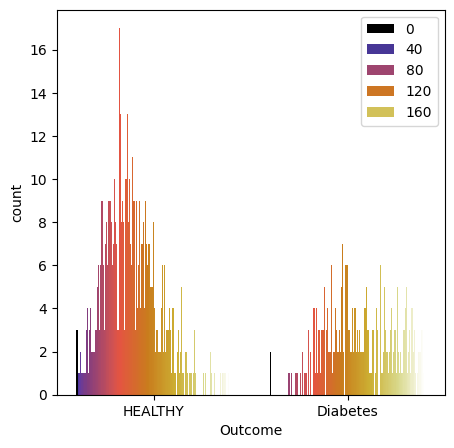

In [118]:
#Glucose vs outcome

labels = ['HEALTHY', 'Diabetes']

fig, ax1 = plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='Outcome',hue="Glucose",data=total_data, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.legend( loc = "best")
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)

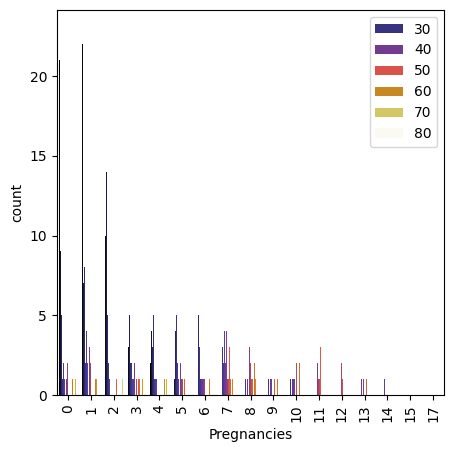

In [119]:
#Pregnancies vs age

fig, ax1 = plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='Pregnancies',hue="Age",data=total_data, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.legend( loc = "best")

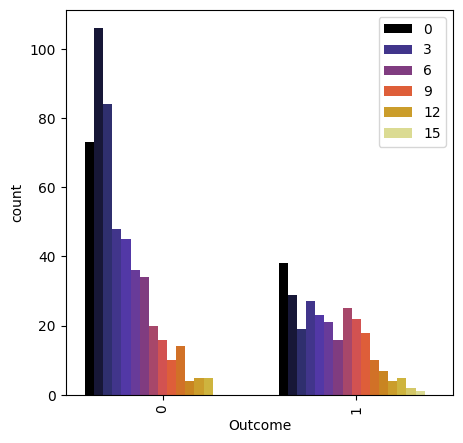

In [120]:
#outcome vs pregnancies
fig, ax1 = plt.subplots(figsize=(5,5))
graph=sns.countplot(ax=ax1,x='Outcome',hue="Pregnancies",data=total_data, palette="CMRmap")
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.legend( loc = "best")

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

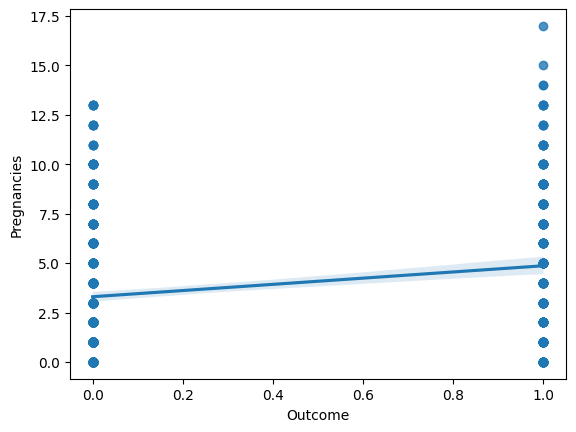

In [121]:
sns.regplot(x=total_data.Outcome, y =total_data.Pregnancies)

## **Step 4: Feature Selection**

In [34]:
X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 4) 
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BMI,Age
0,2.0,84.0,0.0,21.0
1,9.0,112.0,28.2,50.0
2,1.0,139.0,28.7,22.0
3,0.0,161.0,21.9,65.0
4,6.0,134.0,46.2,46.0


In [35]:
X_test_sel.head()

,Pregnancies,Glucose,BMI,Age
0,6.0,98.0,34.0,43.0
1,2.0,112.0,35.7,21.0
2,2.0,108.0,30.8,21.0
3,8.0,107.0,24.6,34.0
4,7.0,136.0,29.9,50.0


In [36]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("/workspaces/machine-learning-python-template/data/processed/clean_test.csv", index = False)

## **Step 5 Decision Tree model**

In [37]:
train_data = pd.read_csv("/workspaces/machine-learning-python-template/data/processed/clean_train.csv")
test_data = pd.read_csv("/workspaces/machine-learning-python-template/data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,2.0,84.0,0.0,21.0,0
1,9.0,112.0,28.2,50.0,1
2,1.0,139.0,28.7,22.0,0
3,0.0,161.0,21.9,65.0,0
4,6.0,134.0,46.2,46.0,1


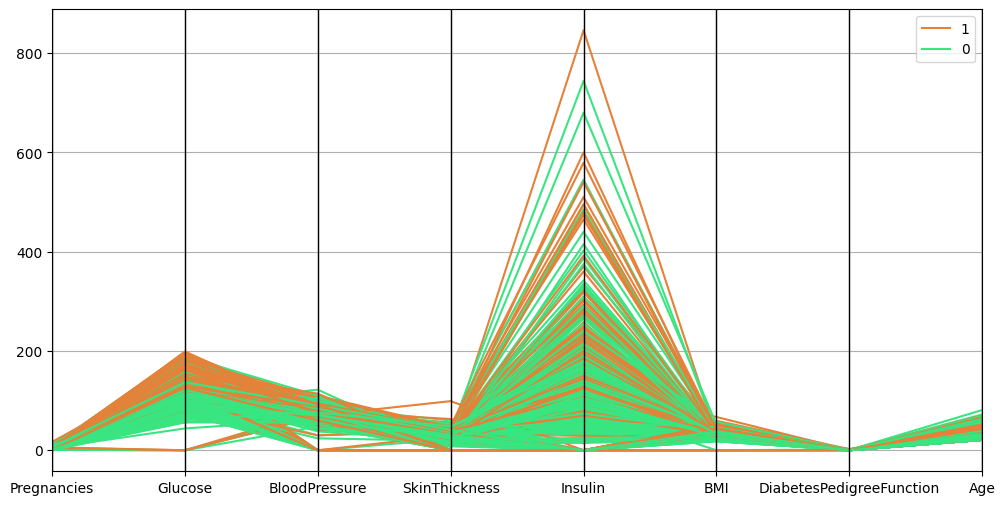

In [147]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [148]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [149]:
model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

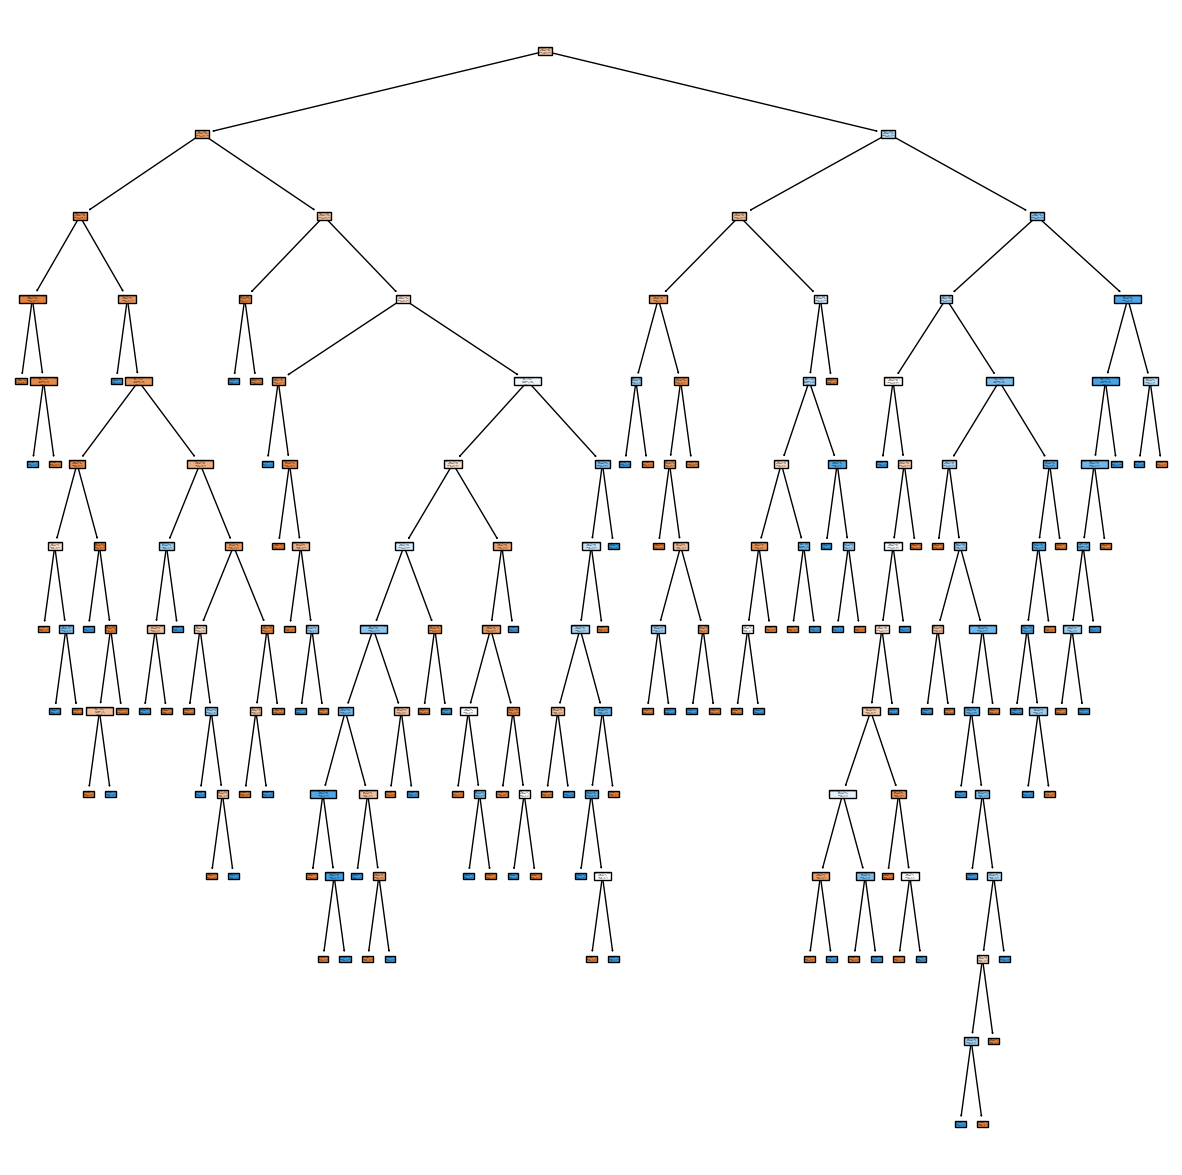

In [150]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [151]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [152]:
accuracy_score(y_test, y_pred)

0.7467532467532467

## **Step 6: Model optimization**

In [153]:
hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [154]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [155]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [156]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [157]:
accuracy_score(y_test, y_pred)

0.7792207792207793

## **Step 7: Save Model**

In [137]:
dump(model, open("../models/tree_classifier_crit-entro_maxdepth-5_minleaf-4_minsplit2_42.sav", "wb"))